The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Features**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (Desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import necessary basic libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# read the data into dataframe
data= pd.read_csv("/content/drive/My Drive/Almabetter/capstone projects/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

In [5]:
# data view
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Renaming the columns
data.rename(columns={'cigsPerDay':'cigarettes_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [7]:
# set column-'id' as the index.
data.set_index('id',inplace=True)
data

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [8]:
# shape of the dataset
data.shape

(3390, 16)

Data has 3390 observations, 15 predictors and a target variable.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 3390 non-null   int64  
 1   education           3303 non-null   float64
 2   sex                 3390 non-null   object 
 3   is_smoking          3390 non-null   object 
 4   cigarettes_per_day  3368 non-null   float64
 5   bp_meds             3346 non-null   float64
 6   prevalent_stroke    3390 non-null   int64  
 7   prevalent_hyp       3390 non-null   int64  
 8   diabetes            3390 non-null   int64  
 9   total_cholesterol   3352 non-null   float64
 10  systolic_bp         3390 non-null   float64
 11  diastolic_bp        3390 non-null   float64
 12  BMI                 3376 non-null   float64
 13  heart_rate          3389 non-null   float64
 14  glucose             3086 non-null   float64
 15  ten_year_chd        3390 non-null   int64  
dtypes: flo

In [10]:
numerical_features=['age','cigarettes_per_day','total_cholesterol','systolic_bp','diastolic_bp','BMI','heart_rate','glucose']
categorical_features=['education','sex','is_smoking','bp_meds','prevalent_stroke','prevalent_hyp','diabetes']

In [11]:
# statistical description of the numerical features of the data
data.describe()

,age,education,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Observation:

* 3390 observations of behavioural, demographic and medical features of individuals(male/female) in the age-group(32-70).

#**DATA CLEANING**

**Missing Value Analysis**

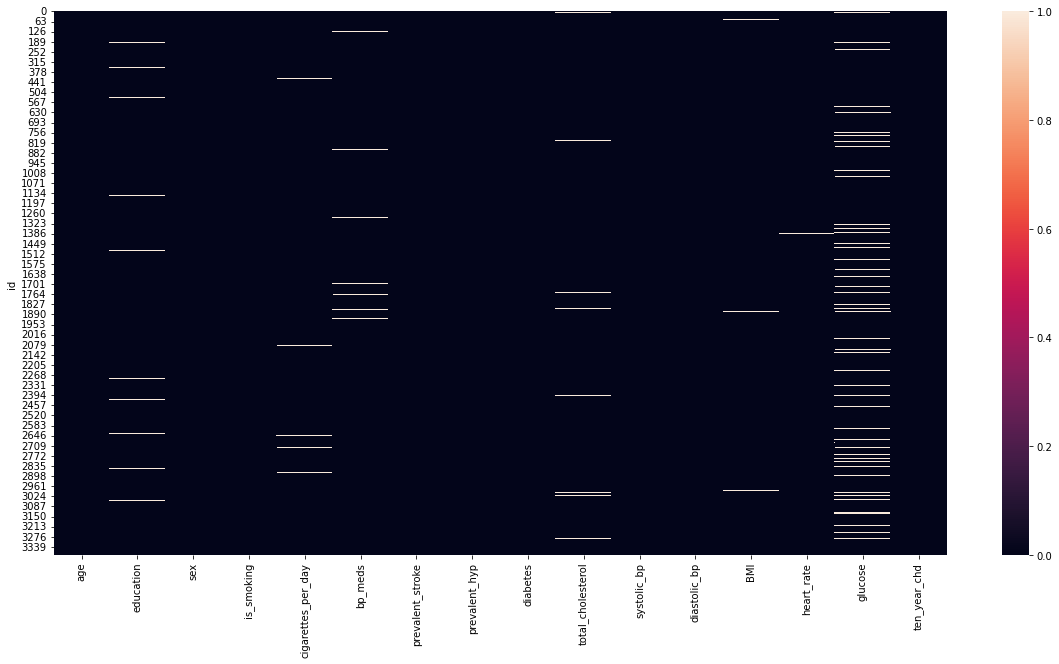

In [12]:
# using heatmap to visualize miising values in data
missing_data= data.isnull()
plt.figure(figsize=(20,10))
sns.heatmap(missing_data)

Dropping the missing data isn't a better choice since, the size of dataset is small. Therefore missing data is imputed with mode/median.

In [13]:
#function to  handle missing value for categorical variables with mode value
def categorical_missing(data,columns):
  '''The missing values in columns are imputed with the respective mode values'''
  for column in columns:
    data[column]=data[column].fillna(data[column].mode()[0])


In [14]:
# function call to insert missing values for variables - education, BPMeds
categorical_missing(data,['education','bp_meds'])


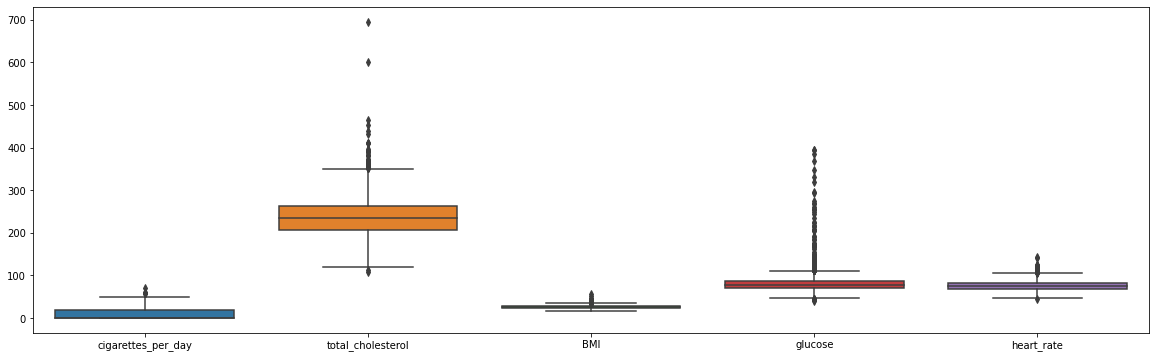

In [15]:
# boxplot for numerical features of data with missing values
plt.figure(figsize=(20,6))
cols=['cigarettes_per_day','total_cholesterol','BMI','glucose','heart_rate']
sns.boxplot(data=data[cols])

The numerical features with missing data have outliers. Therefore as the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value. 

In [16]:
data['cigarettes_per_day'].median()

0.0

Feature- 'cigarettes_per_day' is observed to have a median value: 0.0. The possible entries for feature 'is_smoking' are YES/NO. If the missing value for 'cigarettes_per_day' are imputed with median, it contradicts the entries in case where 'is_smoking' is marked as "YES".

A person marked as smoker cannot be using 0 cigarettes per day.  

Therefore, group the rows based on whether the person smokes, and then impute the missing values with the median of the grouped data.

In [17]:
# imputing the missing values of the column- 'cigarettes_per_day' with the median after grouping the data
data['cigarettes_per_day']= data['cigarettes_per_day'].fillna(data[data['is_smoking']=="YES"]['cigarettes_per_day'].median())


In [18]:
# check for any invalid observations
# invalid observation: where 'is_smoking'=1 and  'cigarettes_per_day'=1  or 'is_smoking'=0 and  'cigarettes_per_day'>0
data[(data['is_smoking']=="YES") & (data['cigarettes_per_day']==0) | (data['is_smoking']=="NO") & (data['cigarettes_per_day']>0)] 


,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [19]:
# function to handle missing data in numerical columns using median 
def numerical_missing(data, columns):
  '''The missing values in the column are imputed with median of respective column'''
  for column in columns:
    data[column]=data[column].fillna(data[column].median())

In [20]:
# function call to impute missing values on columns- 'totChol','BMI','heartRate','glucose'.
numerical_missing(data,[['total_cholesterol','BMI','glucose','heart_rate']])

In [21]:
# check for missing values
data.isna().sum()

age                   0
education             0
sex                   0
is_smoking            0
cigarettes_per_day    0
bp_meds               0
prevalent_stroke      0
prevalent_hyp         0
diabetes              0
total_cholesterol     0
systolic_bp           0
diastolic_bp          0
BMI                   0
heart_rate            0
glucose               0
ten_year_chd          0
dtype: int64

In [22]:
data

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1




---



**Outlier Analysis**

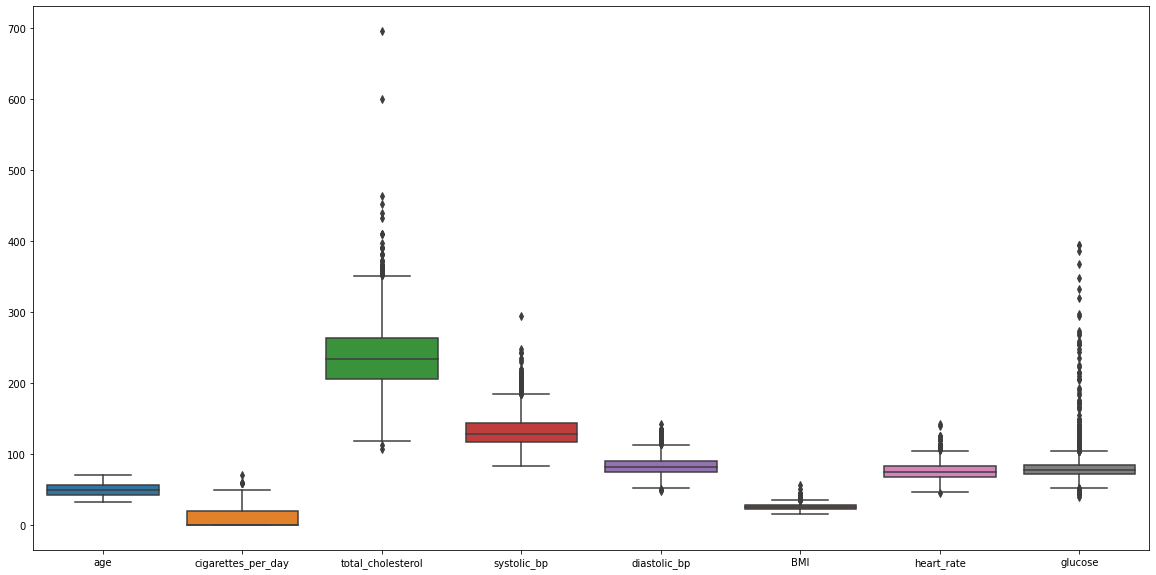

In [23]:
# boxplot for numerical columns
plt.figure(figsize=(20,10))
sns.boxplot(data= data[numerical_features])

Since, the extreme/outlier values of features in the dataset indicate the risk of cardiovascular problems that can be observed in the exploratory data analysis further, therefore, deleting/modifying the values wouldn't be a good thing to do. 

**Correlation Analysis**

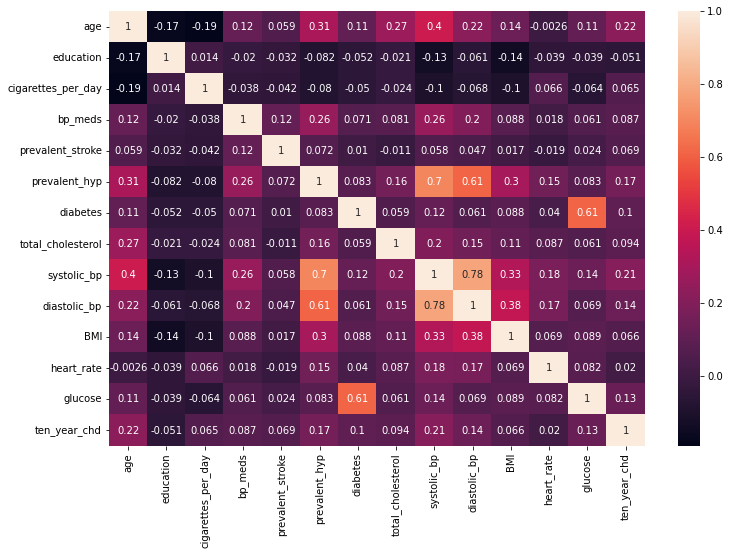

In [24]:
# plot the correlation matrix using heatmap
plt.figure(figsize=(12,8))
correlation = data.corr()
sns.heatmap(correlation, annot=True)

Observation:

* There is a slight positive correlation between ten_year_chd and features namely age, prevalent hypertension, diabetes, systolic_bp, diastolic_bp, glucose. 
* Independent variables are correlated among themselves.
  * High correlation of systolic bp and diastolic bp with prevalent hypertension.
  * High value of glucose levels may indicate diabetes with correlation (0.61).
  * Systolic and diastolic blood pressure are highly correlated(0.78): New feature could be derived using the two features.

##**Exploratory Data Analysis**

0    2879
1     511
Name: ten_year_chd, dtype: int64

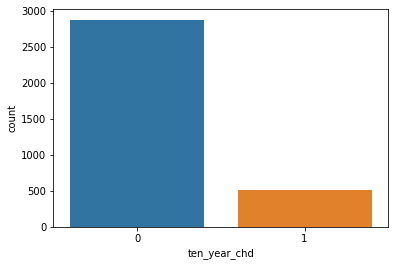

In [25]:
# dependent variable analysis
sns.countplot(data['ten_year_chd'])
data['ten_year_chd'].value_counts()

* The dependent variable is binary(categoric). Hence, a classification problem.
* There is an imbalalance in the dataset, that should be taken into consideration during further analysis.


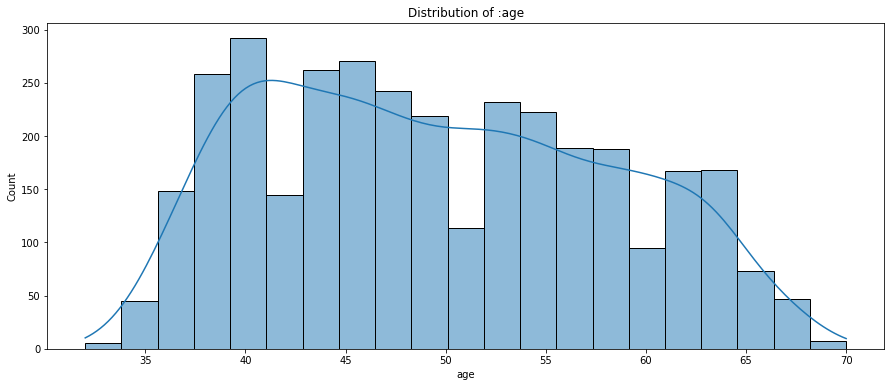

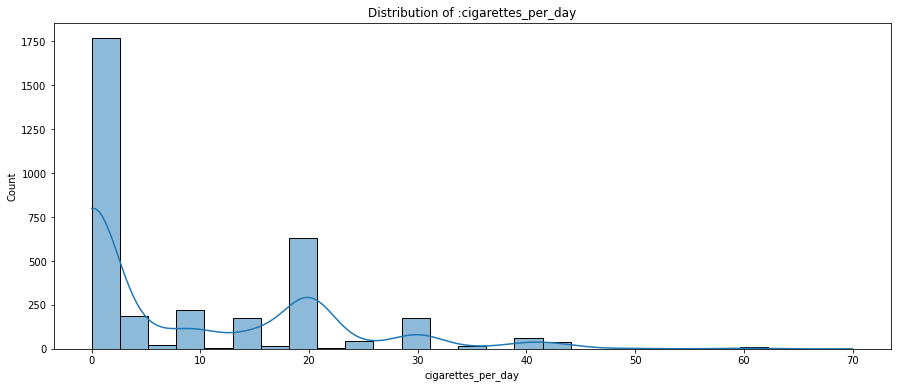

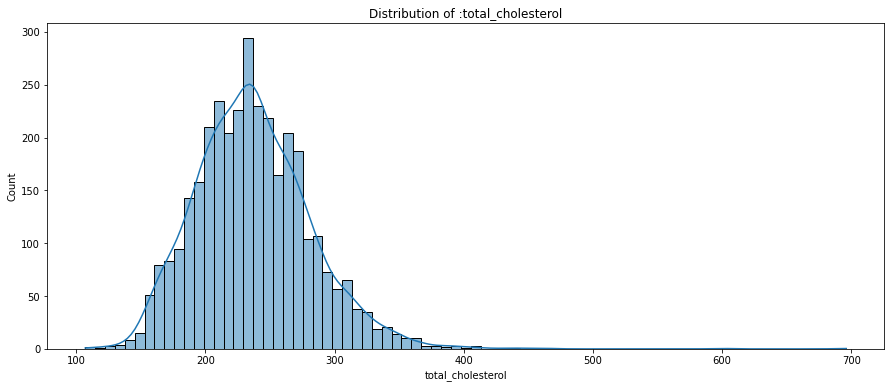

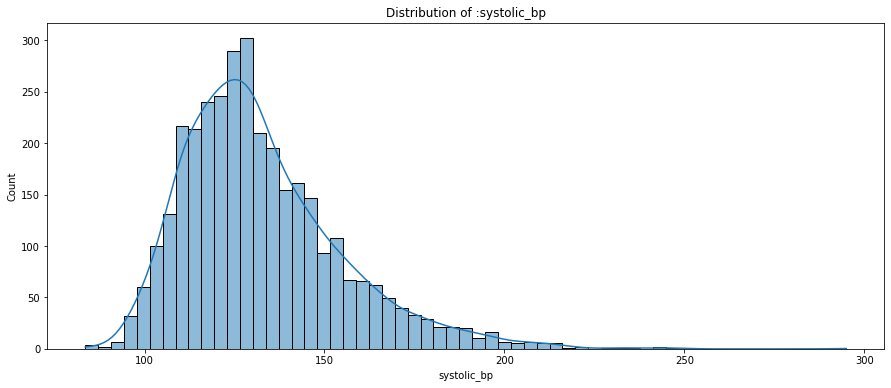

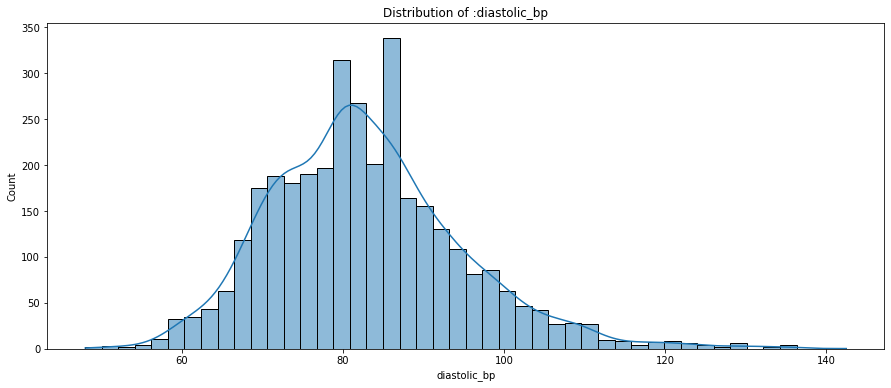

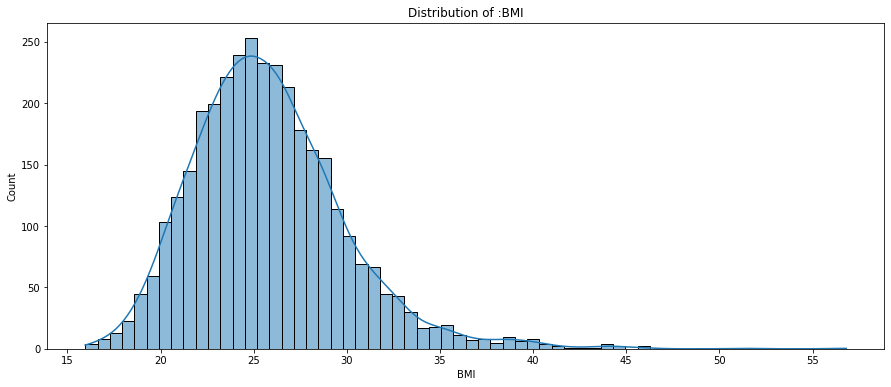

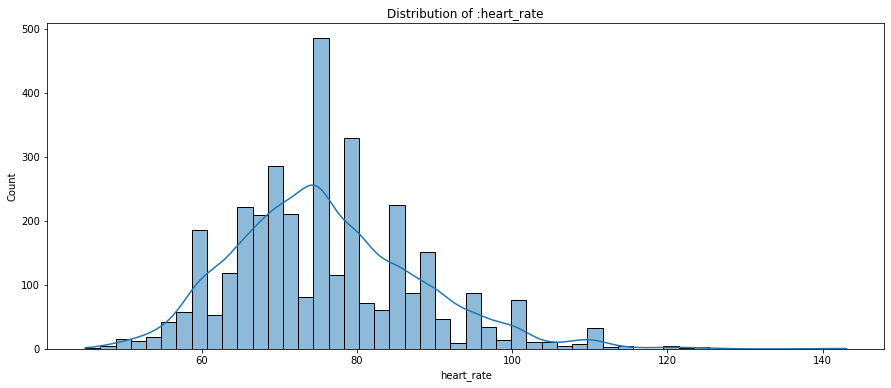

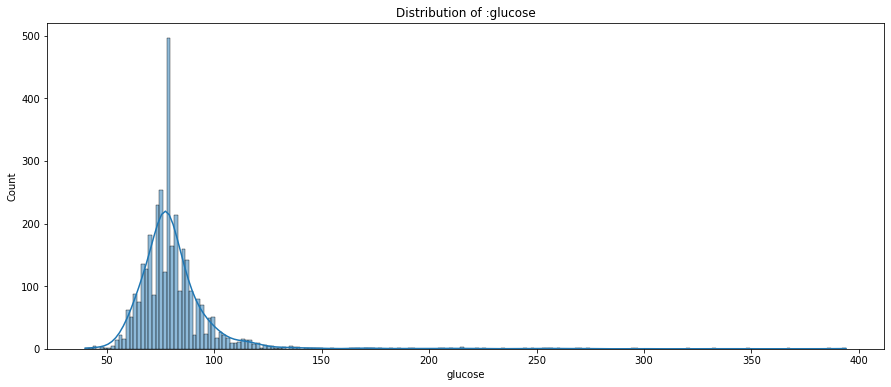

In [26]:
# independent numerical feature variable analysis using histogram 
for feature in numerical_features:
  plt.figure(figsize=(15,6))
  sns.histplot( x = data[feature], kde = True)
  plt.title('Distribution of :' +feature)
  plt.show()

Observation:

* The data is collected for patients of agegroup -> 35-70.
* Most of the patients are non-smokers.
* Features- 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'glucose', 'BMI' are rightly skewed.

In [27]:
# independent categorical features analysis using count and barplot

def plot_percentage(data,categorical_features):
  ''' function to plot the count and percentage of patients at the risk of coronary heart disease based on different categorical features'''

  for feature in categorical_features:
    plt.rcParams["figure.figsize"] = [12,5]
    f, axes = plt.subplots(1, 2)
    sns.countplot(x=feature,hue='ten_year_chd',data=data,ax=axes[0])  

    x_var, y_var = feature, 'ten_year_chd'
    data_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    sns.set()
    data_grouped.plot(kind='bar', stacked=True,ax=axes[1])
    plt.legend(bbox_to_anchor=(1.05, 1),loc="upper left",title=y_var)

    plt.title("Analysis of count and percentage of patients at the risk of coronary heart disease based on feature: "+ feature)
    for ix, row in data_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(ix,cumulative + element / 2,f"{int(element)} %",va="center",ha="center")
            cumulative += element
    plt.show()


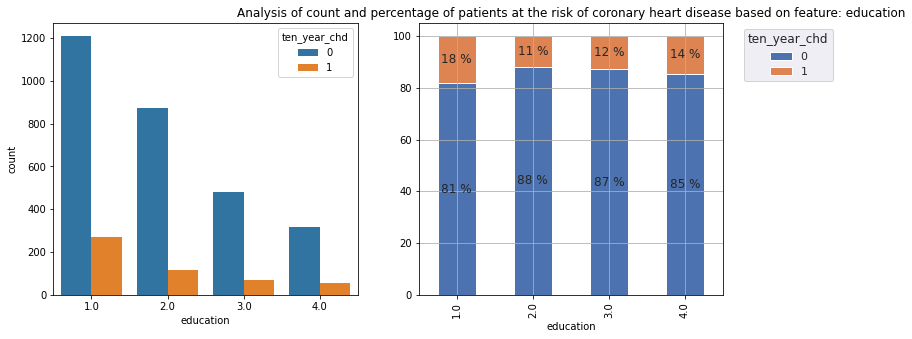

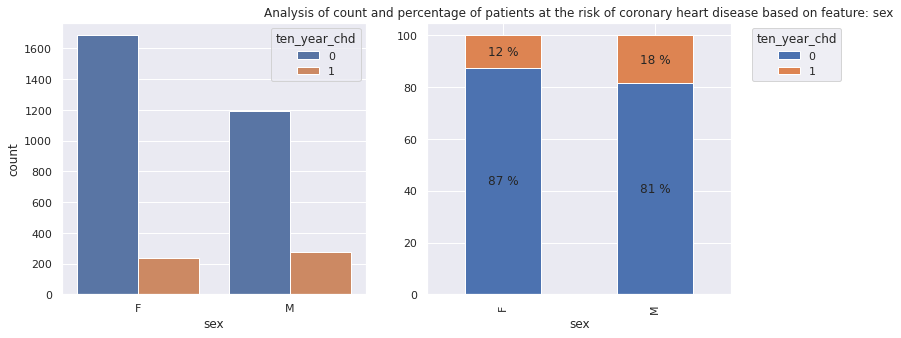

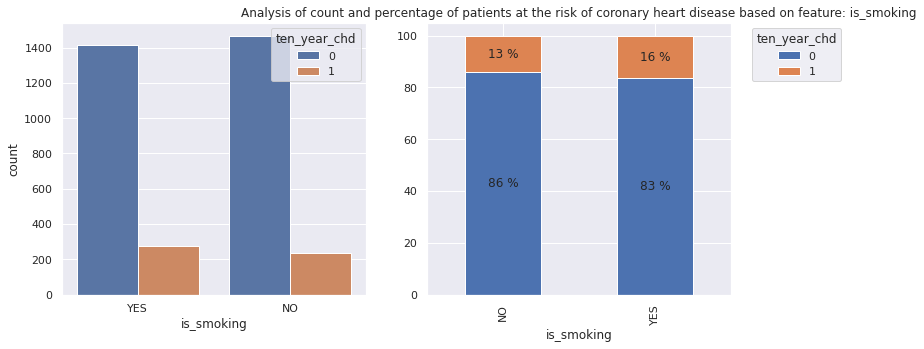

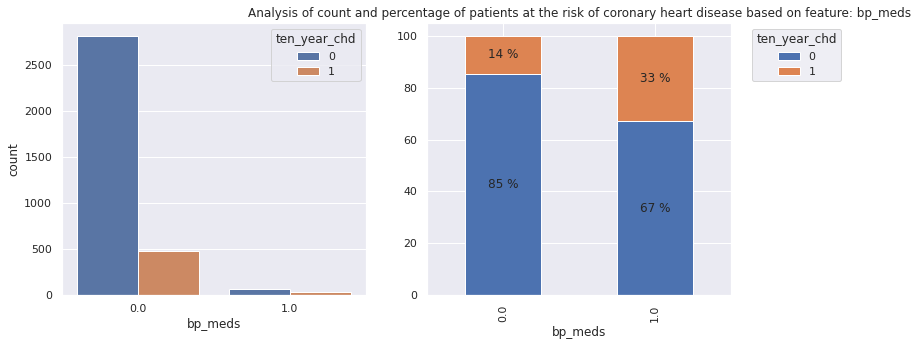

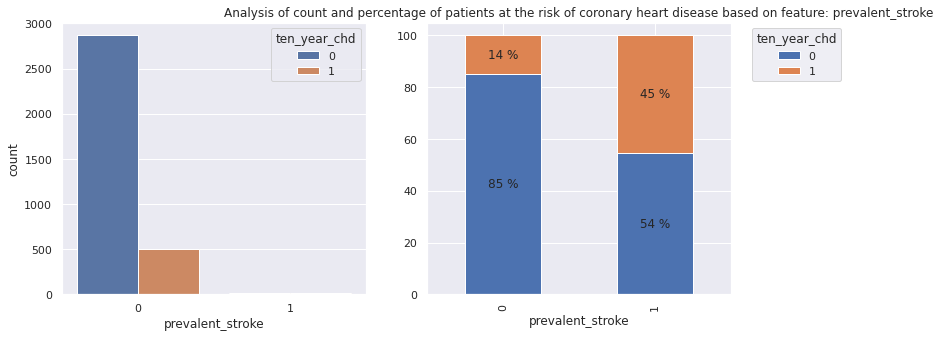

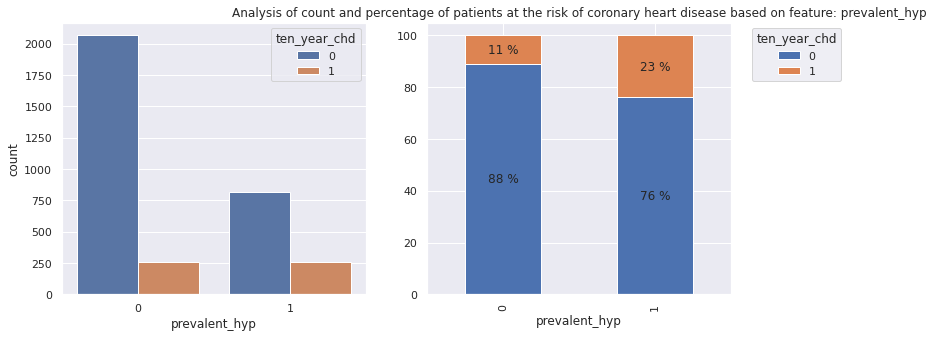

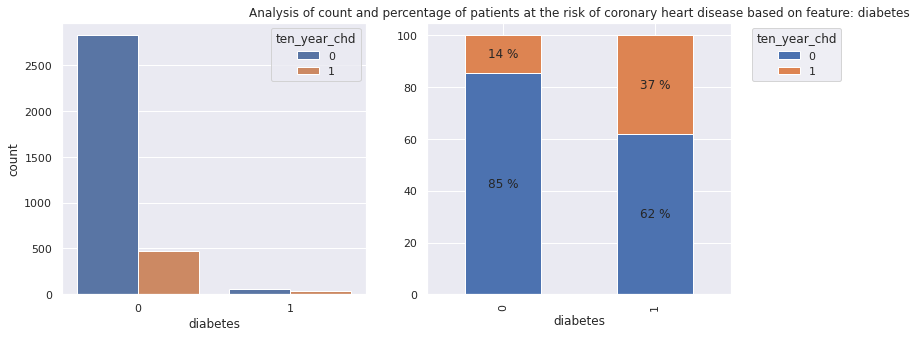

In [28]:
plot_percentage(data,categorical_features)

Observation:

* Most of the patients posses education of level 1. The risk of the coronary heart disease is maximum in patients of education level 1, followed by patients of education level 4, 3, 2.
* The count of female patients is more. Whereas, the risk of the coronary heart disease is higher in male patients by 6%.
* There are almost equal number of smoking and non-smoking patients. The risk of disease is higher in smokers by 3%.
* Patients who are on blood pressure medication have significantly higher risk of coronary heart disease i.e., 33%.
* Prevalent stroke is rarely seen in patients. But the risk of coronary heart disease among them is significantly higher (45%), that is 31% higher than the others.
* Hypertension is seen in many patients (~800). Patients with prevalent hypertension are at higher risk by 12%.
* Out of the very few patients with diagonized with diabetes, 37% of them are at risk of coronary heart disease.

In [29]:
# function to measure the heart rate of patients.
def heart_rate_measure(observation):
  ''' classifies the heart rate of patients into three different categories namely low, normal, and high'''
  
  if observation['heart_rate'] <= 59:
      value = 'Low'
  elif observation['heart_rate'] < 100:
      value = 'Normal'
  else:
      value = 'High'
  return value

In [30]:
# assign a copy of data and apply the transformation on column- 'heart_rate' by making a call to above function.
data1=data.copy(deep=True)
data1['heart_rate'] = data1.apply(heart_rate_measure, axis = 1)

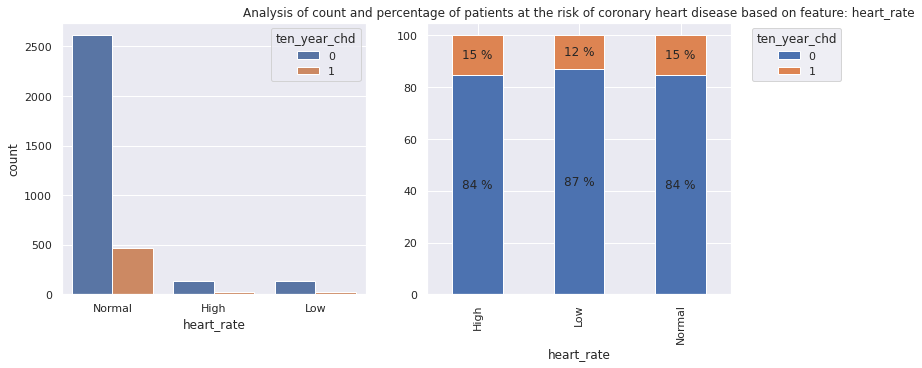

In [31]:
# function call to plot the count and percentage of patients at risk based on the different category of heartbeat.
plot_percentage(data1,['heart_rate'])


The risk of the coronary heart disease is higher by 3% for patients with high and normal heartbeat compared to that of low heartbeat.

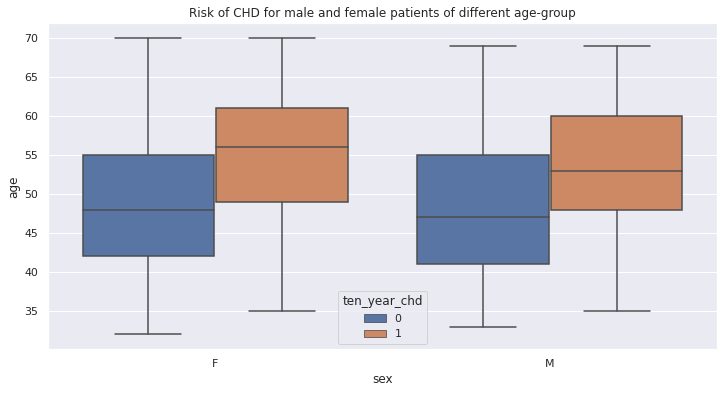

In [32]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data['sex'], y = data['age'], hue =data['ten_year_chd'])
plt.title("Risk of CHD for male and female patients of different age-group")
plt.show()

Female patients of agegroup (49-62) and Male patients of agegroup (48-60) are vulnerable to the risk of CHD.
The average age of risk of CHD is higher in female patients.


##**Feature Engineering**

In [33]:
data

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


Encoding

In [34]:
# encoding binary values for categorical columns- 'sex' and 'is_smoking'
data['sex']=np.where(data['sex']=='M',1,0)
data['is_smoking']=np.where(data['is_smoking']=='YES',1,0)
data.head()

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Feature Selection: Correlation Analysis

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. Also, the change in one of them could hamper the effect of other on the dependent variable.  

So, when two features have high correlation, either one of them could be dropped or a new feature can be produced using the two. The latter is implemented in this case.

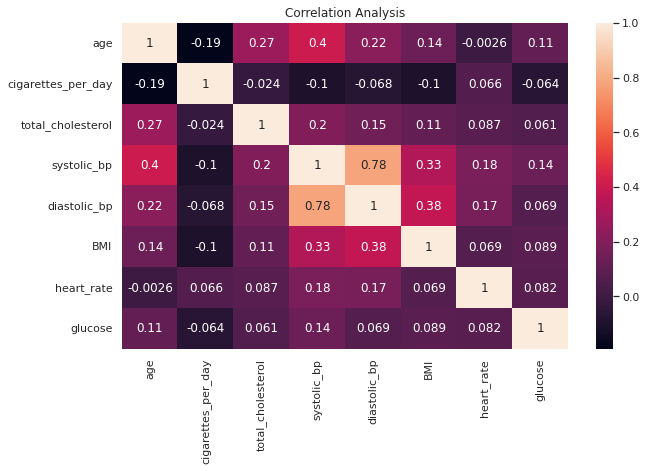

In [35]:
# check for correlation among numerical features and try to eliminate the highly correlated independent features.
plt.figure(figsize=(10,6))
plt.title('Correlation Analysis')
correlation = data[numerical_features].corr()
sns.heatmap(correlation,annot=True)

The features- 'systolic_bp' and 'diastolic_bp' are highly correlated. Hence these two features can be replaced by their difference, called **Pulse Pressure.**

Pulse pressure is the difference between the upper and lower numbers of blood pressure. Pulse pressure tends to increase as one gets older, and this number can also be an indicator of health problems before the symptoms are developed.

***Pulse Pressure*** = ***Systolic Blood Pressure*** - ***Diastolic Blood Pressure***

Normal value: 40mmHg i.e., if blood pressure is 120/80 mmHg.


In [36]:
# add the new feature and delete the features systolic and diastolic bp.
data['pulse_pressure'] = data['systolic_bp'] - data['diastolic_bp']
data.drop(['systolic_bp','diastolic_bp'], axis = 1, inplace = True)


Feature Selection: Chi-Square Test

A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

The formula for Chi-Square is given by:


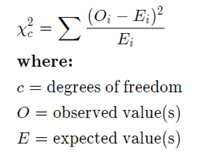

In feature selection, we aim to select the features which are highly dependent on the response. Higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

Further p_value is used to define the feature selection quantitatively. It gives us the probability of observing what we observed, given a hypothesis is true.

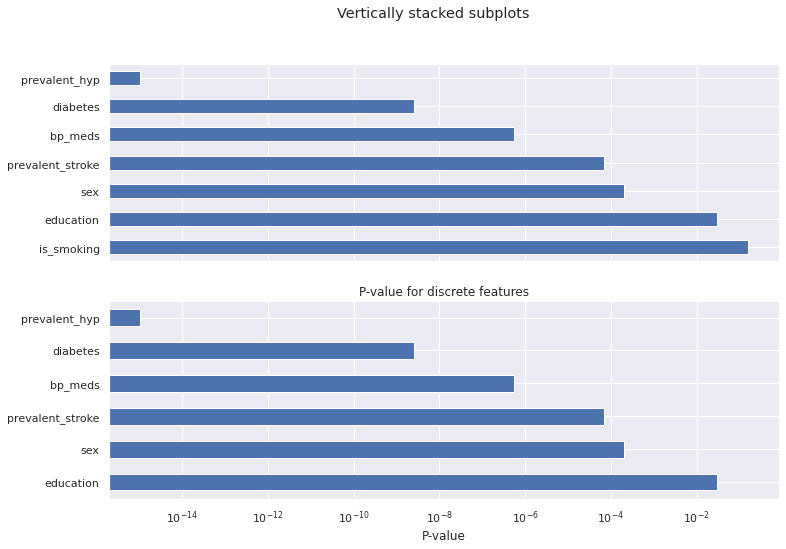

In [37]:
# Chi-Square test is used to test the independence in categorical features.
from sklearn.feature_selection import chi2
X = data[categorical_features]
y = data['ten_year_chd']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

# plt.figure(figsize=(10,5))
# plt.xscale('log')
# plt.xlabel('P-value')
# plt.title('P-value for discrete features')
# p_values.plot.barh()


fig, axs = plt.subplots(2, figsize = (12,8),sharex=True)
fig.suptitle('Vertically stacked subplots')
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh(ax=axs[0])


p_values_new = p_values[p_values<0.05]

plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values_new.plot.barh(ax=axs[1])


In [255]:
# since feature 'cigarettes_per_day' includes the information provided by 'is_smoking', feature 'is_smoking' becomes redundant. Therefore drop the same 
data.drop('is_smoking', axis = 1, inplace = True)


Feature Selection: Annova F-Test (F-Statistic)

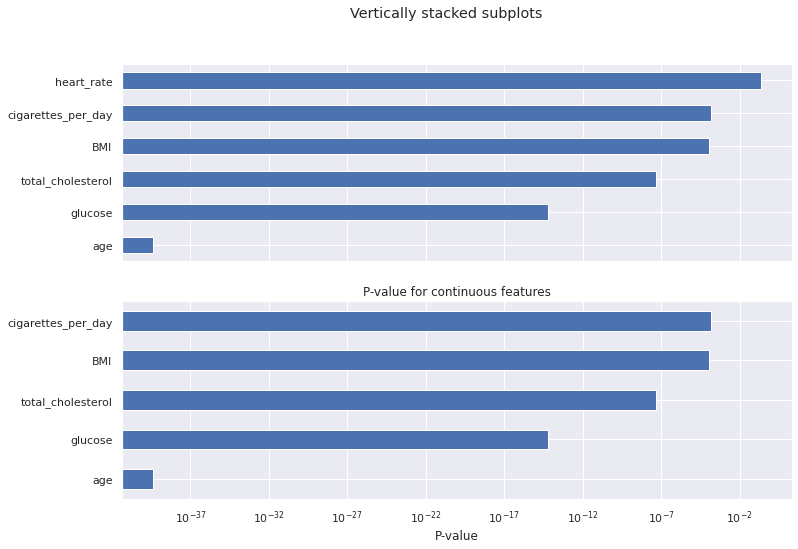

In [256]:
numerical_features= list(set(numerical_features)-set(['systolic_bp','diastolic_bp']))
X=data[numerical_features]
from sklearn.feature_selection import f_classif
values= f_classif(X, y)
p_values = pd.Series(values[1])
p_values.index = data[numerical_features].columns
p_values.sort_values(ascending = True, inplace = True)


fig, axs = plt.subplots(2, figsize = (12,8),sharex=True)
fig.suptitle('Vertically stacked subplots')
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for continuous features')
p_values.plot.barh(ax=axs[0])


p_values_new = p_values[p_values<0.05]

plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for continuous features')
p_values_new.plot.barh(ax=axs[1])

In [257]:
data.drop('heart_rate', axis = 1, inplace = True)


In [258]:
data

,age,education,sex,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,BMI,glucose,ten_year_chd,pulse_pressure
id,,,,,,,,,,,,,
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,94.0,0,45.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,94.0,1,70.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,77.0,0,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,0.0,0.0,0,0,0,261.0,29.28,103.0,0,44.5
3386,46,1.0,0,0.0,0.0,0,0,0,199.0,21.96,84.0,0,46.0
3387,44,3.0,1,3.0,0.0,0,1,0,352.0,28.92,72.0,1,45.0
